# Linear Regression Example - 线性回归示例

Linear regression implementation with TensorFlow v2 library.
使用TensorFlow v2库实现线性回归

This example is using a low-level approach to better understand all mechanics behind the training process.
这个例子使用了一个低阶的方法来更好地理解训练过程背后的所有机制。

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [118]:
from __future__ import absolute_import, division, print_function

In [119]:
import tensorflow as tf
import numpy as np
rng = np.random

In [120]:
# Parameters. - 定义超参数
learning_rate = 0.01 # 超参数, 学习率, 用于控制单次学习的幅度
training_steps = 1000 # 超参数, 训练次数
display_step = 10 # 超参数, 每隔多少次显示一次训练结果

In [121]:
# Training Data. - 定义数据, 这里理解为输入数据。X是输入数据, Y是理想的输出数据
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [122]:
# Weight and Bias, initialized randomly. - 定义权重和偏置, 并初始化为随机数
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b). - 定义线性回归函数, 类似于中学数学的一次函数, y = kx + b
def linear_regression(x):
    return W * x + b

# Mean square error. - 定义均方误差方法, 用于评估模型输出的数据y_pred和真实数据y_true之间的差距。这里作Loss Function用
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true)) # 即对每维度的数据求模型输出和真实值的差的平方, 然后求平均值

# Stochastic Gradient Descent Optimizer. - 随机梯度下降优化器, 用于更新模型参数。随机性体现在使用随机的Mini-batch数据进行模型整体的参数更新
optimizer = tf.optimizers.SGD(learning_rate)

In [123]:
# Optimization process. - 优化过程, 即训练过程 的方法定义
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation. - 使用GradientTape进行自动微分计算
    with tf.GradientTape() as g:
        pred = linear_regression(X) # 计算模型预测值
        loss = mean_square(pred, Y) # 计算模型预测值和真实值之间的差距, 即Loss

    # Compute gradients. - 使用GradientTape的gradient方法计算梯度
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients. - 使用上面定义的优化器, 更新模型参数
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [124]:
# Run training for the given number of steps. - 迭代指定次数进行训练
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values. - 运行优化方法, 更新模型参数
    run_optimization()
    
    # 译者注：这里译者修改了代码的显示间隔，以让读者能清晰地看到Loss的下降过程
    if step % display_step == 0 and step <= 200: # 每隔若干次, 打印一次训练结果
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 10, loss: 0.369605, W: 0.437842, b: -0.521326
step: 20, loss: 0.359368, W: 0.433371, b: -0.489626
step: 30, loss: 0.349616, W: 0.429007, b: -0.458687
step: 40, loss: 0.340328, W: 0.424748, b: -0.428490
step: 50, loss: 0.331480, W: 0.420591, b: -0.399019
step: 60, loss: 0.323052, W: 0.416534, b: -0.370256
step: 70, loss: 0.315023, W: 0.412574, b: -0.342183
step: 80, loss: 0.307376, W: 0.408709, b: -0.314785
step: 90, loss: 0.300092, W: 0.404937, b: -0.288044
step: 100, loss: 0.293153, W: 0.401256, b: -0.261946
step: 110, loss: 0.286544, W: 0.397663, b: -0.236474
step: 120, loss: 0.280248, W: 0.394157, b: -0.211614
step: 130, loss: 0.274251, W: 0.390734, b: -0.187351
step: 140, loss: 0.268538, W: 0.387394, b: -0.163670
step: 150, loss: 0.263096, W: 0.384134, b: -0.140558
step: 160, loss: 0.257913, W: 0.380952, b: -0.118001
step: 170, loss: 0.252976, W: 0.377847, b: -0.095986
step: 180, loss: 0.248273, W: 0.374816, b: -0.074499
step: 190, loss: 0.243793, W: 0.371858, b: -0.053529
st

In [125]:
import matplotlib.pyplot as plt

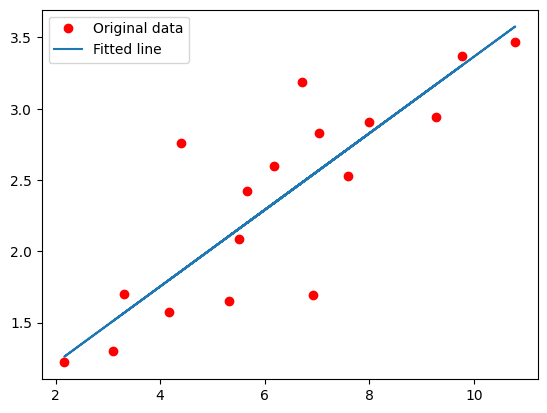

In [126]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data') # 绘制原始数据，红色圆点
plt.plot(X, np.array(W * X + b), label='Fitted line') # 绘制拟合的线性回归线。因为这里只有一层神经元, 所以是一次函数
plt.legend()
plt.show()